In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load the inference pickle file
with open('/storage/vbutoi/scratch/ESE/records/inference_stats.pkl', 'rb') as f:
    all_logs = pickle.load(f)

In [3]:
all_logs

subj_idx  slice  label_predicted  label_amount metric  \
0              0      0              0.0           0.0    ECE   
1              0      0              0.0           0.0    ECE   
2              0      0              0.0           0.0    ESE   
3              0      0              0.0           0.0    ESE   
4              0      1              0.0           0.0    ECE   
...          ...    ...              ...           ...    ...   
110587         6    254              0.0           0.0    ESE   
110588         6    255              0.0           0.0    ECE   
110589         6    255              0.0           0.0    ECE   
110590         6    255              0.0           0.0    ESE   
110591         6    255              0.0           0.0    ESE   

       metric_weighting  metric_score  \
0               uniform  0.000000e+00   
1          proportional  0.000000e+00   
2               uniform  4.350784e-08   
3          proportional  4.350784e-07   
4               uniform  0.000000e+00   
...                 ...           ...   
110587     proportional  4.350784e-07   
110588          uniform  0.000000e+00   
110589     proportional  0.000000e+00   
110590          uniform  4.350784e-08   
110591     proportional  4.350784e-07   

                                              metric_bins  \
0                               (0.0, 0.0, 0.0, 0.0, 0.0)   
1                               (0.0, 0.0, 0.0, 0.0, 0.0)   
2       (4.3507836e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3       (4.3507836e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4                               (0.0, 0.0, 0.0, 0.0, 0.0)   
...                                                   ...   
110587  (4.3507836e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
110588                          (0.0, 0.0, 0.0, 0.0, 0.0)   
110589                          (0.0, 0.0, 0.0, 0.0, 0.0)   
110590  (4.3507836e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
110591  (4.3507836e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               bin_counts  Acc  Balanced_Acc  \
0                               (0.0, 0.0, 0.0, 0.0, 0.0)  1.0           1.0   
1                               (0.0, 0.0, 0.0, 0.0, 0.0)  1.0           1.0   
2       (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  1.0           1.0   
3       (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  1.0           1.0   
4                               (0.0, 0.0, 0.0, 0.0, 0.0)  1.0           1.0   
...                                                   ...  ...           ...   
110587  (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  1.0           1.0   
110588                          (0.0, 0.0, 0.0, 0.0, 0.0)  1.0           1.0   
110589                          (0.0, 0.0, 0.0, 0.0, 0.0)  1.0           1.0   
110590  (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  1.0           1.0   
110591  (65536.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  1.0           1.0   

        Dice       task  split  
0        1.0  Singapore  train  
1        1.0  Singapore  train  
2        1.0  Singapore  train  
3        1.0  Singapore  train  
4        1.0  Singapore  train  
...      ...        ...    ...  
110587   1.0  Amsterdam    cal  
110588   1.0  Amsterdam    cal  
110589   1.0  Amsterdam    cal  
110590   1.0  Amsterdam    cal  
110591   1.0  Amsterdam    cal  

[110592 rows x 14 columns]

In [4]:
all_logs.iloc[0]

subj_idx                                    0
slice                                       0
label_predicted                           0.0
label_amount                              0.0
metric                                    ECE
metric_weighting                      uniform
metric_score                              0.0
metric_bins         (0.0, 0.0, 0.0, 0.0, 0.0)
bin_counts          (0.0, 0.0, 0.0, 0.0, 0.0)
Acc                                       1.0
Balanced_Acc                              1.0
Dice                                      1.0
task                                Singapore
split                                   train
Name: 0, dtype: object

In [5]:
example = all_logs.iloc[0]
for field in example.keys():
    print(field, type(example[field]), ":", example[field])

subj_idx <class 'numpy.int64'> : 0
slice <class 'numpy.int64'> : 0
label_predicted <class 'numpy.float64'> : 0.0
label_amount <class 'numpy.float64'> : 0.0
metric <class 'str'> : ECE
metric_weighting <class 'str'> : uniform
metric_score <class 'numpy.float64'> : 0.0
metric_bins <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
bin_counts <class 'tuple'> : (0.0, 0.0, 0.0, 0.0, 0.0)
Acc <class 'numpy.float64'> : 1.0
Balanced_Acc <class 'numpy.float64'> : 1.0
Dice <class 'numpy.float64'> : 1.0
task <class 'str'> : Singapore
split <class 'str'> : train


# First let's look at how (for this model) dice and accuracy are related.

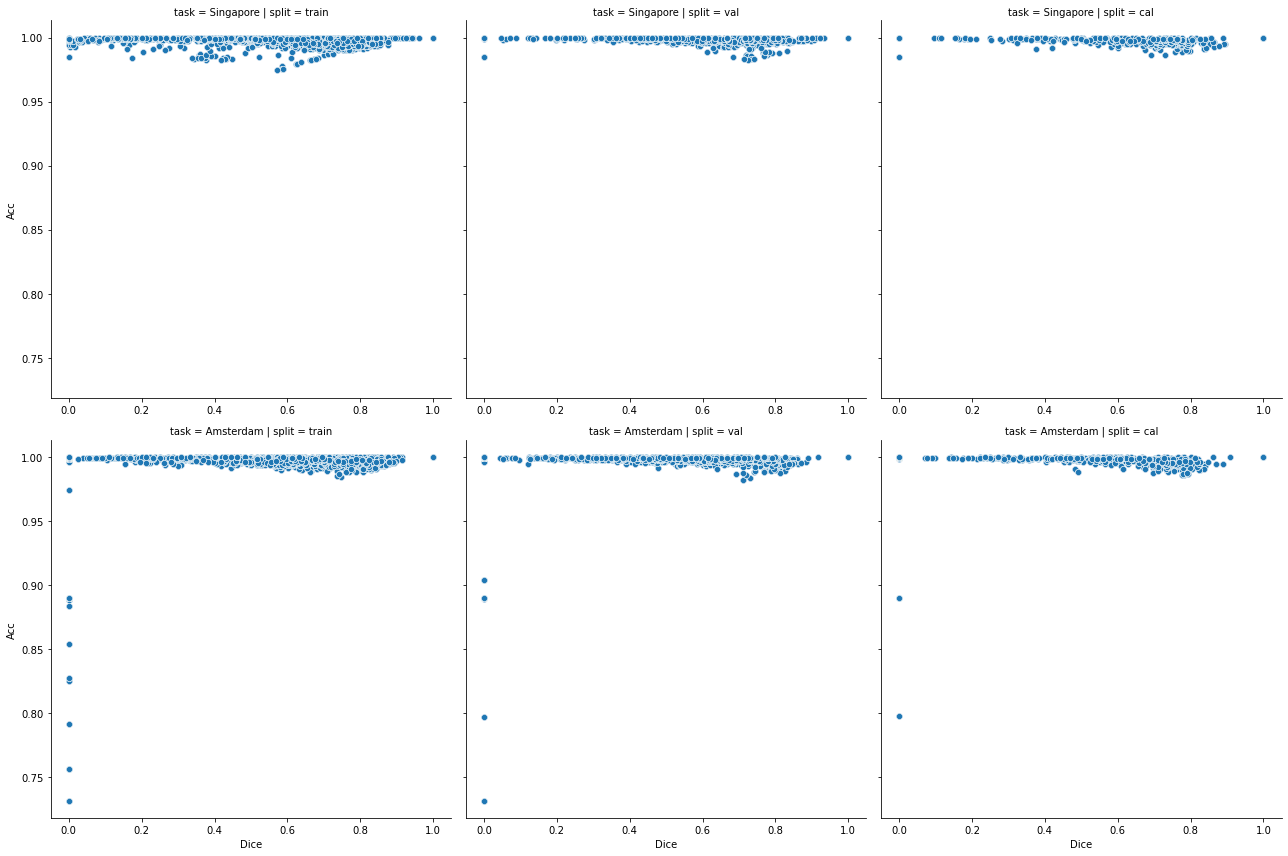

In [6]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='Dice',
    y='Acc',
    row='task',
    col='split',
    kind='scatter',
    height=6,
    facet_kws={"sharex": False}
    )

In [7]:
# Isolate the cases which have no-label and cases where there is at least some label.
def has_label(value):
    return (value != 0.0)

def weighted_metric(metric, weighting):
    return f"{metric}_{weighting}"

# Add some new useful columns
all_logs['has_label'] = all_logs['label_amount'].apply(has_label) 
all_logs['weighted_metric'] = all_logs.apply(lambda row: weighted_metric(row['metric'], row['metric_weighting']), axis=1)

# Drop some columns we won't use like metric_bins, and bin_counts
all_logs = all_logs.drop(columns=['metric_bins', 'bin_counts'])

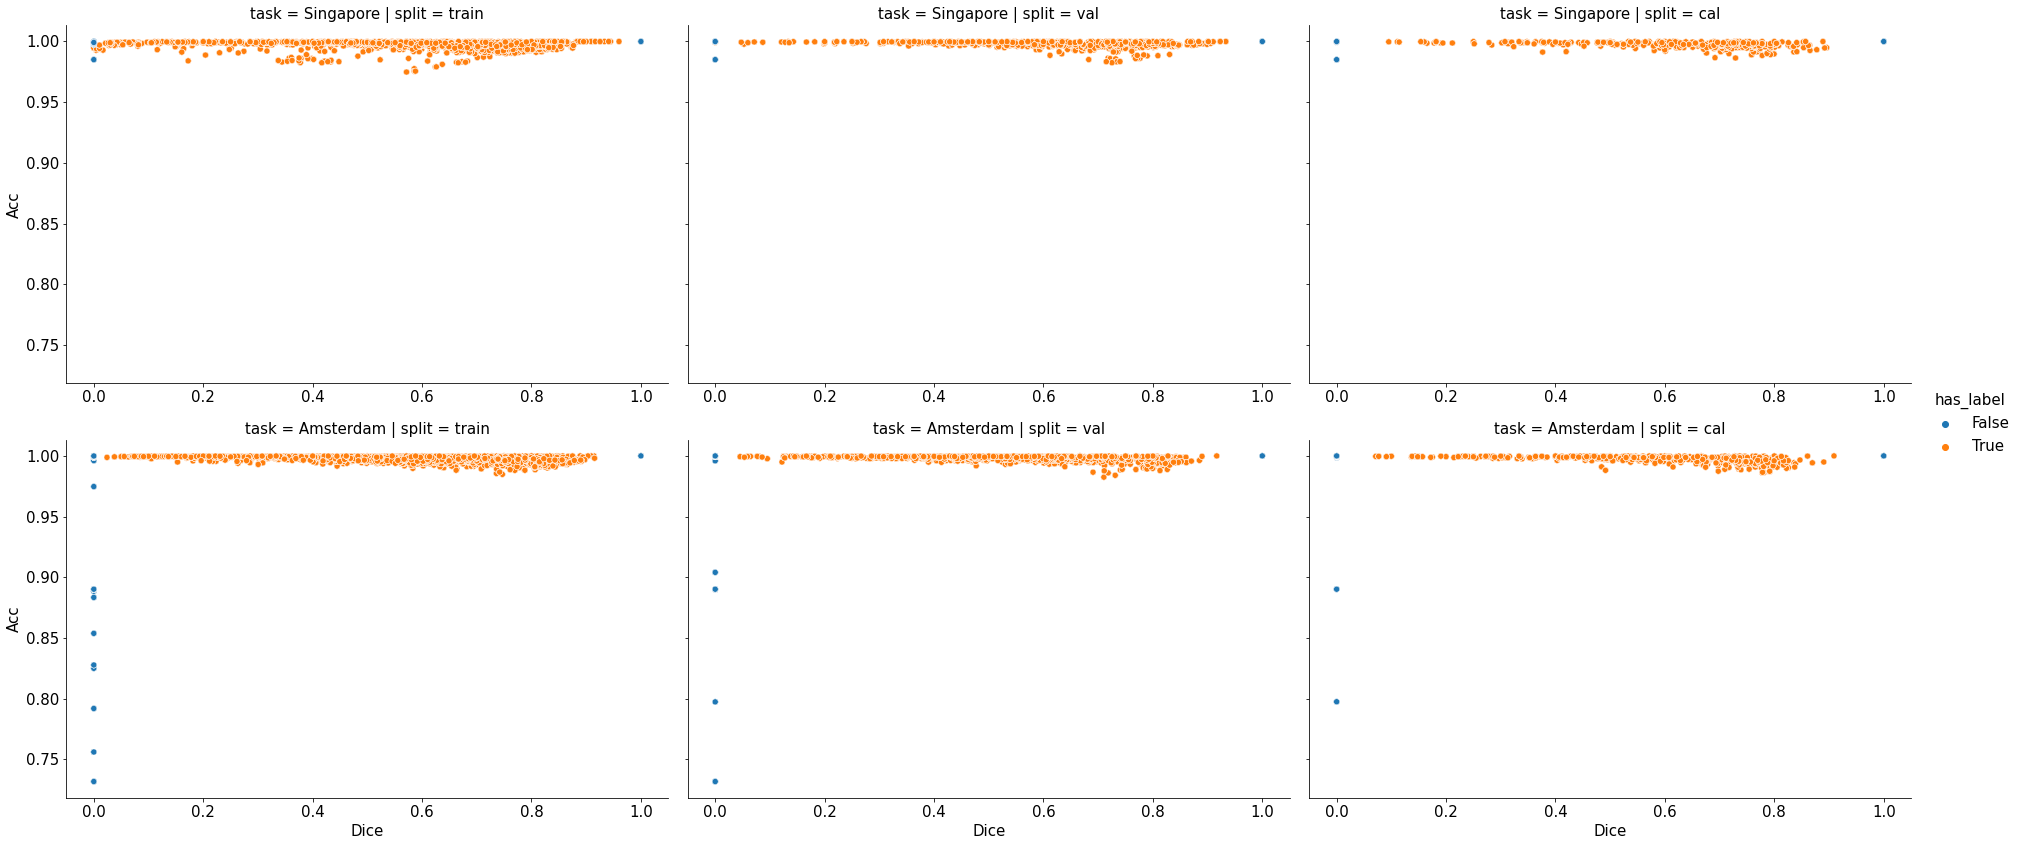

In [8]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=all_logs,
    x='Dice',
    y='Acc',
    row='task',
    col='split',
    kind='scatter',
    hue='has_label',
    height=6,
    facet_kws={"sharex": False},
    aspect=1.5
    )

In [9]:
logs = all_logs[all_logs['has_label'] == True]

# Now we want to collapse the data by subject, so we can get the mean metric score for each subject.
logs_per_subject = all_logs.groupby(['subj_idx', 'metric', 'metric_weighting', 'weighted_metric', 'task', 'split']).agg({
    'label_amount': 'mean',
    'metric_score': 'mean',
    'Acc': 'mean',
    'Dice': 'mean',
    'Balanced_Acc': 'mean'
}).reset_index()

In [10]:
logs_per_subject

subj_idx metric metric_weighting   weighted_metric       task  split  \
0           0    ECE     proportional  ECE_proportional  Amsterdam    cal   
1           0    ECE     proportional  ECE_proportional  Amsterdam  train   
2           0    ECE     proportional  ECE_proportional  Amsterdam    val   
3           0    ECE     proportional  ECE_proportional  Singapore    cal   
4           0    ECE     proportional  ECE_proportional  Singapore  train   
..        ...    ...              ...               ...        ...    ...   
427        39    ESE          uniform       ESE_uniform  Amsterdam  train   
428        40    ECE     proportional  ECE_proportional  Amsterdam  train   
429        40    ECE          uniform       ECE_uniform  Amsterdam  train   
430        40    ESE     proportional  ESE_proportional  Amsterdam  train   
431        40    ESE          uniform       ESE_uniform  Amsterdam  train   

     label_amount  metric_score       Acc      Dice  Balanced_Acc  
0       95.804688      0.140715  0.998300  0.722702      0.924194  
1        7.746094      0.144463  0.999841  0.743614      0.912939  
2       71.187500      0.162578  0.994585  0.753874      0.945249  
3      239.578125      0.060432  0.998414  0.837538      0.914113  
4      314.496094      0.069428  0.997388  0.820527      0.907223  
..            ...           ...       ...       ...           ...  
427    182.996094      0.087090  0.998715  0.767375      0.954188  
428    167.074219      0.135863  0.995195  0.770124      0.943381  
429    167.074219      0.121020  0.995195  0.770124      0.943381  
430    167.074219      0.004950  0.995195  0.770124      0.943381  
431    167.074219      0.094383  0.995195  0.770124      0.943381  

[432 rows x 11 columns]

# Now for the graph we really care about, let's look at how each metric/weighting correlates first with dice.

In [11]:
# Define the color palette
metric_weight_palette = {
    'ECE_uniform': 'red',  # red
    'ECE_proportional': 'orange',  # green
    'ESE_uniform': 'blue',  # blue
    'ESE_proportional': 'purple'   # yellow
}

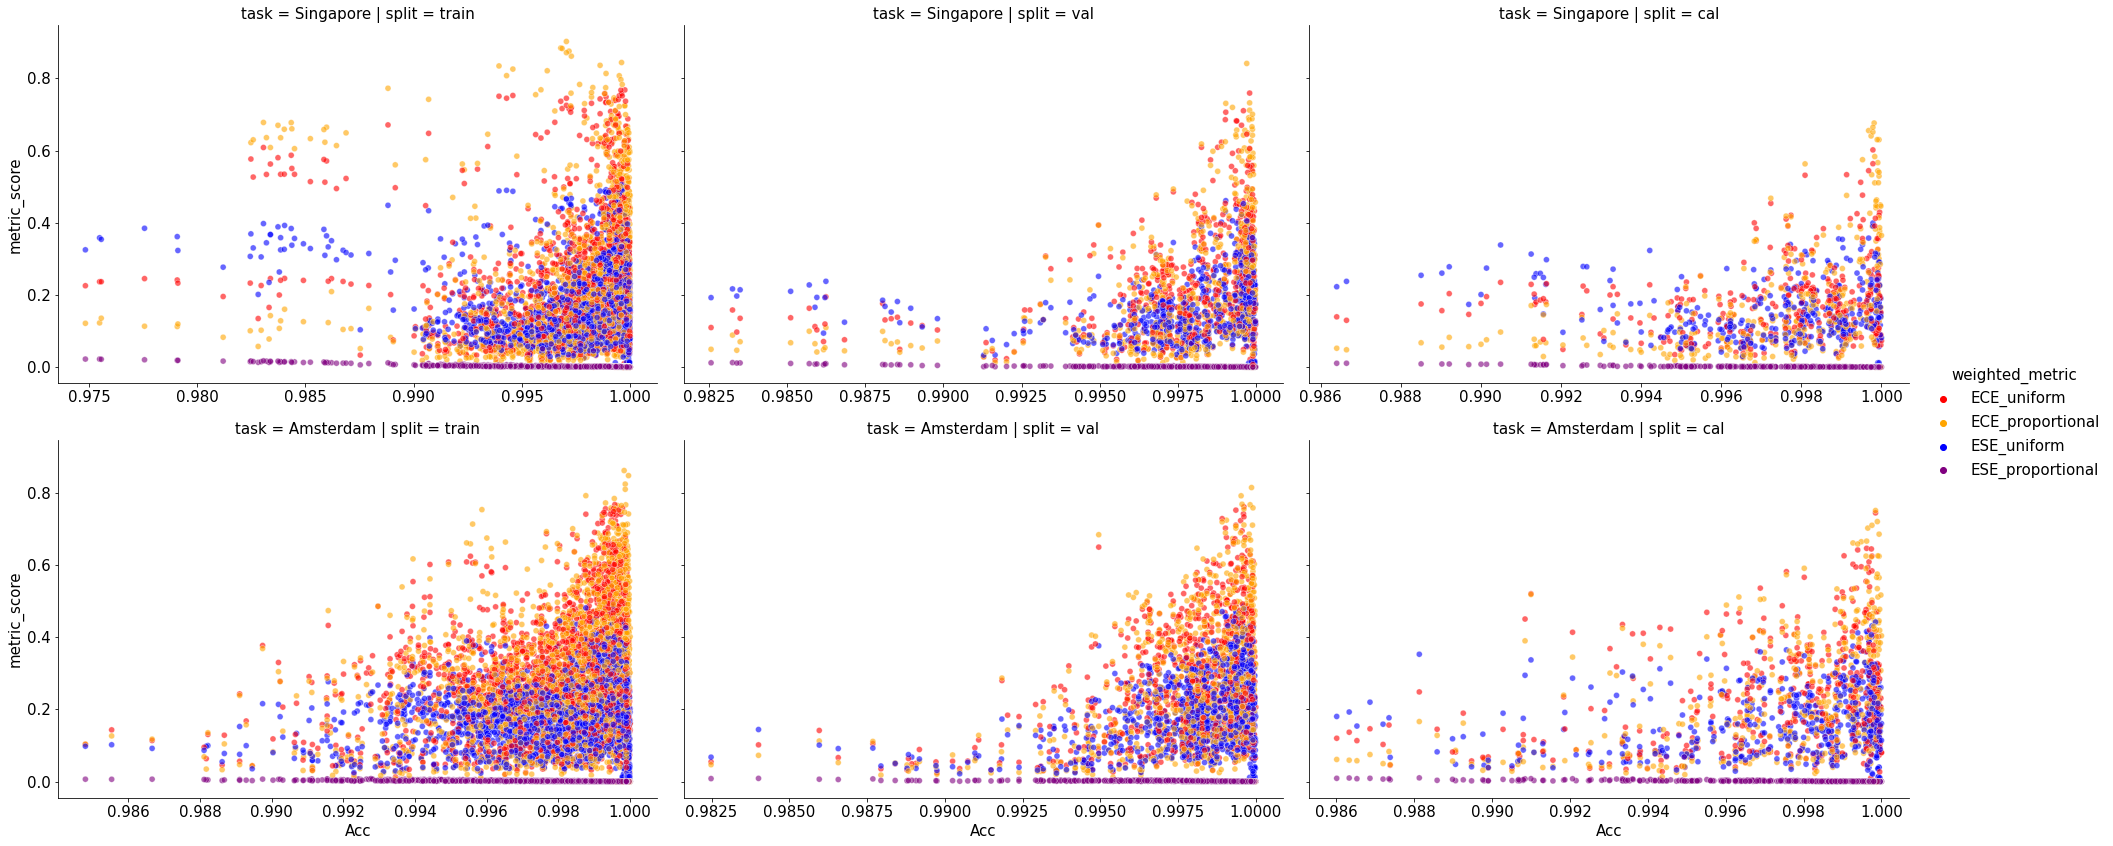

In [12]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='Acc',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

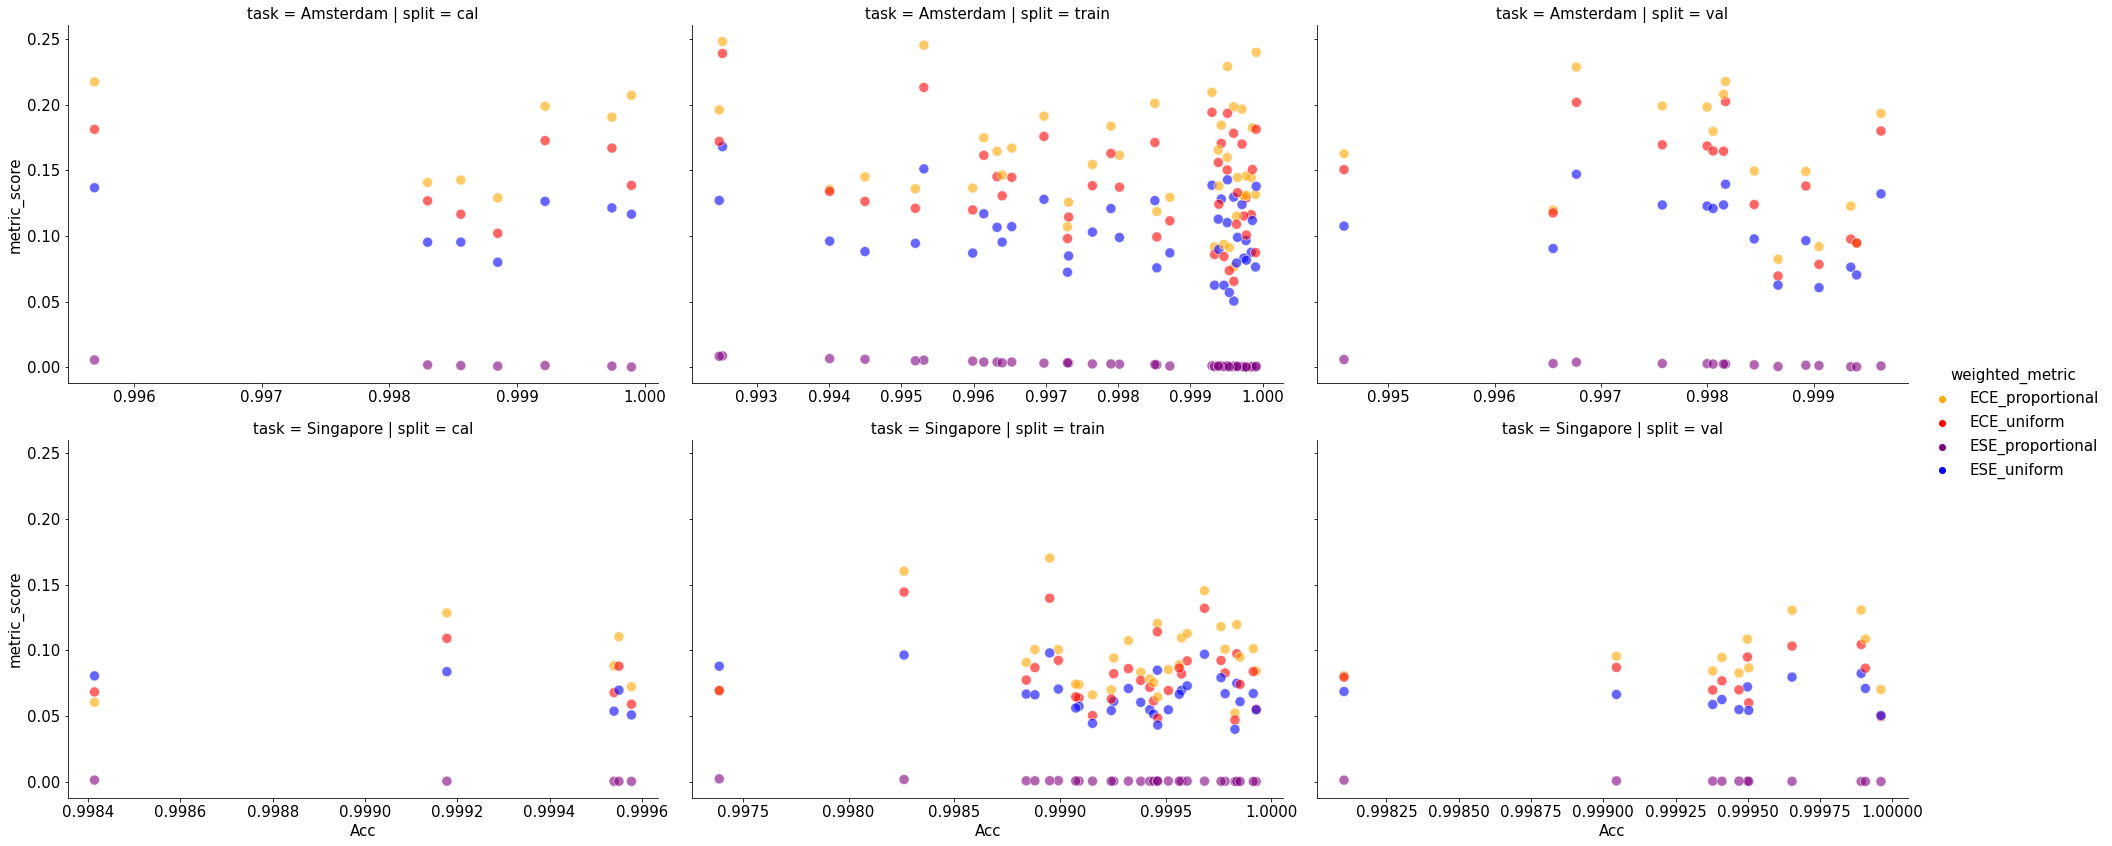

In [13]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='Acc',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

# Now how well does it correspond with pixel-wise accuracy?

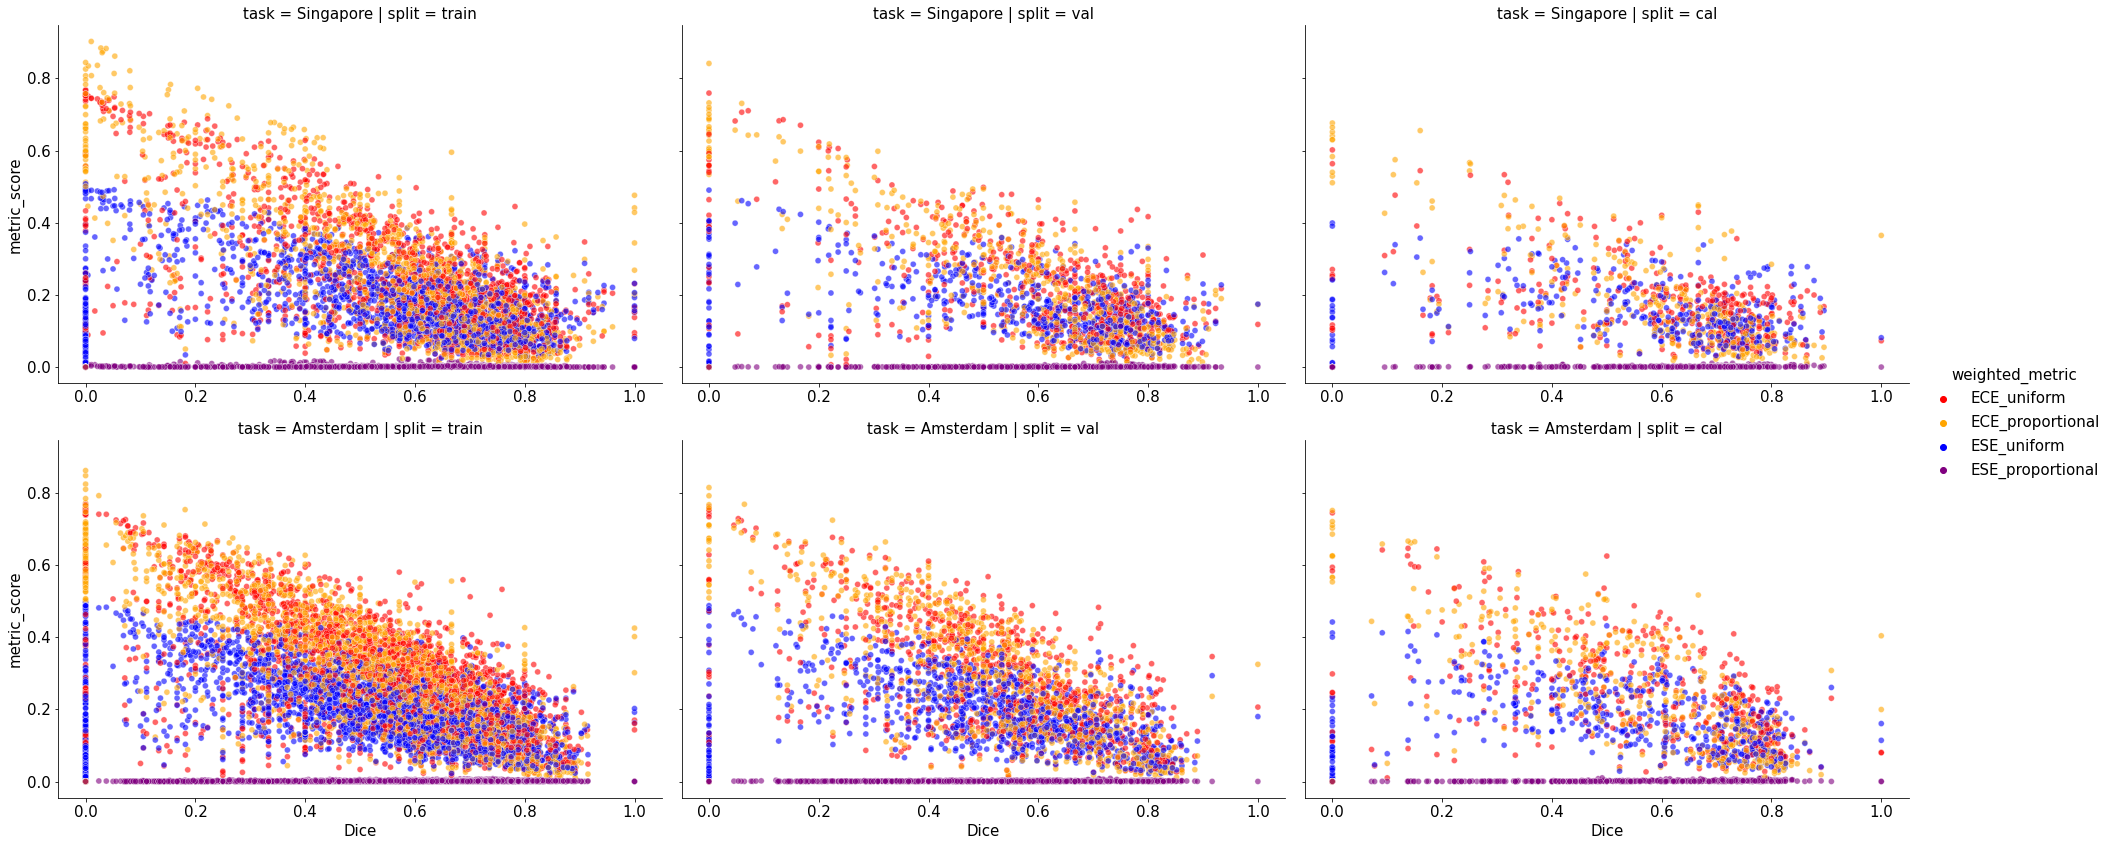

In [14]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='Dice',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

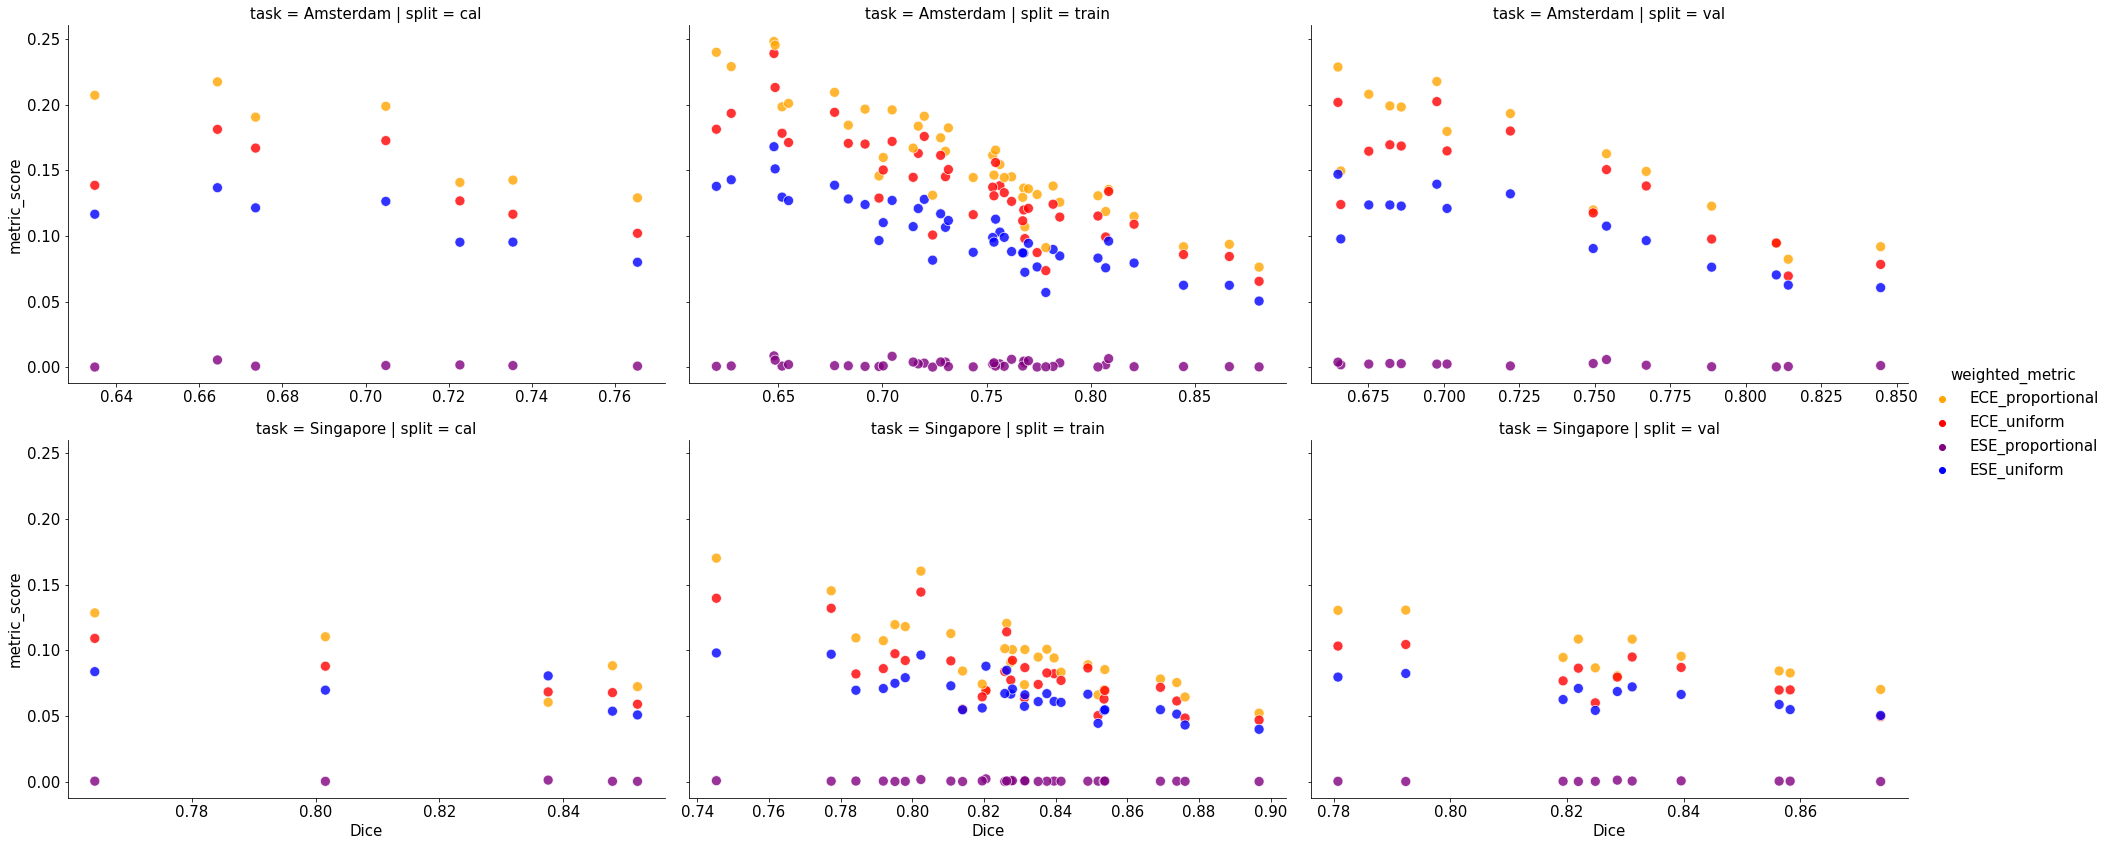

In [15]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='Dice',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.8,
    aspect=1.5
    )

# Or how they correlate with the amount of label in the groundtruth segmentation.

AttributeError: 'NoneType' object has no attribute 'get_title'

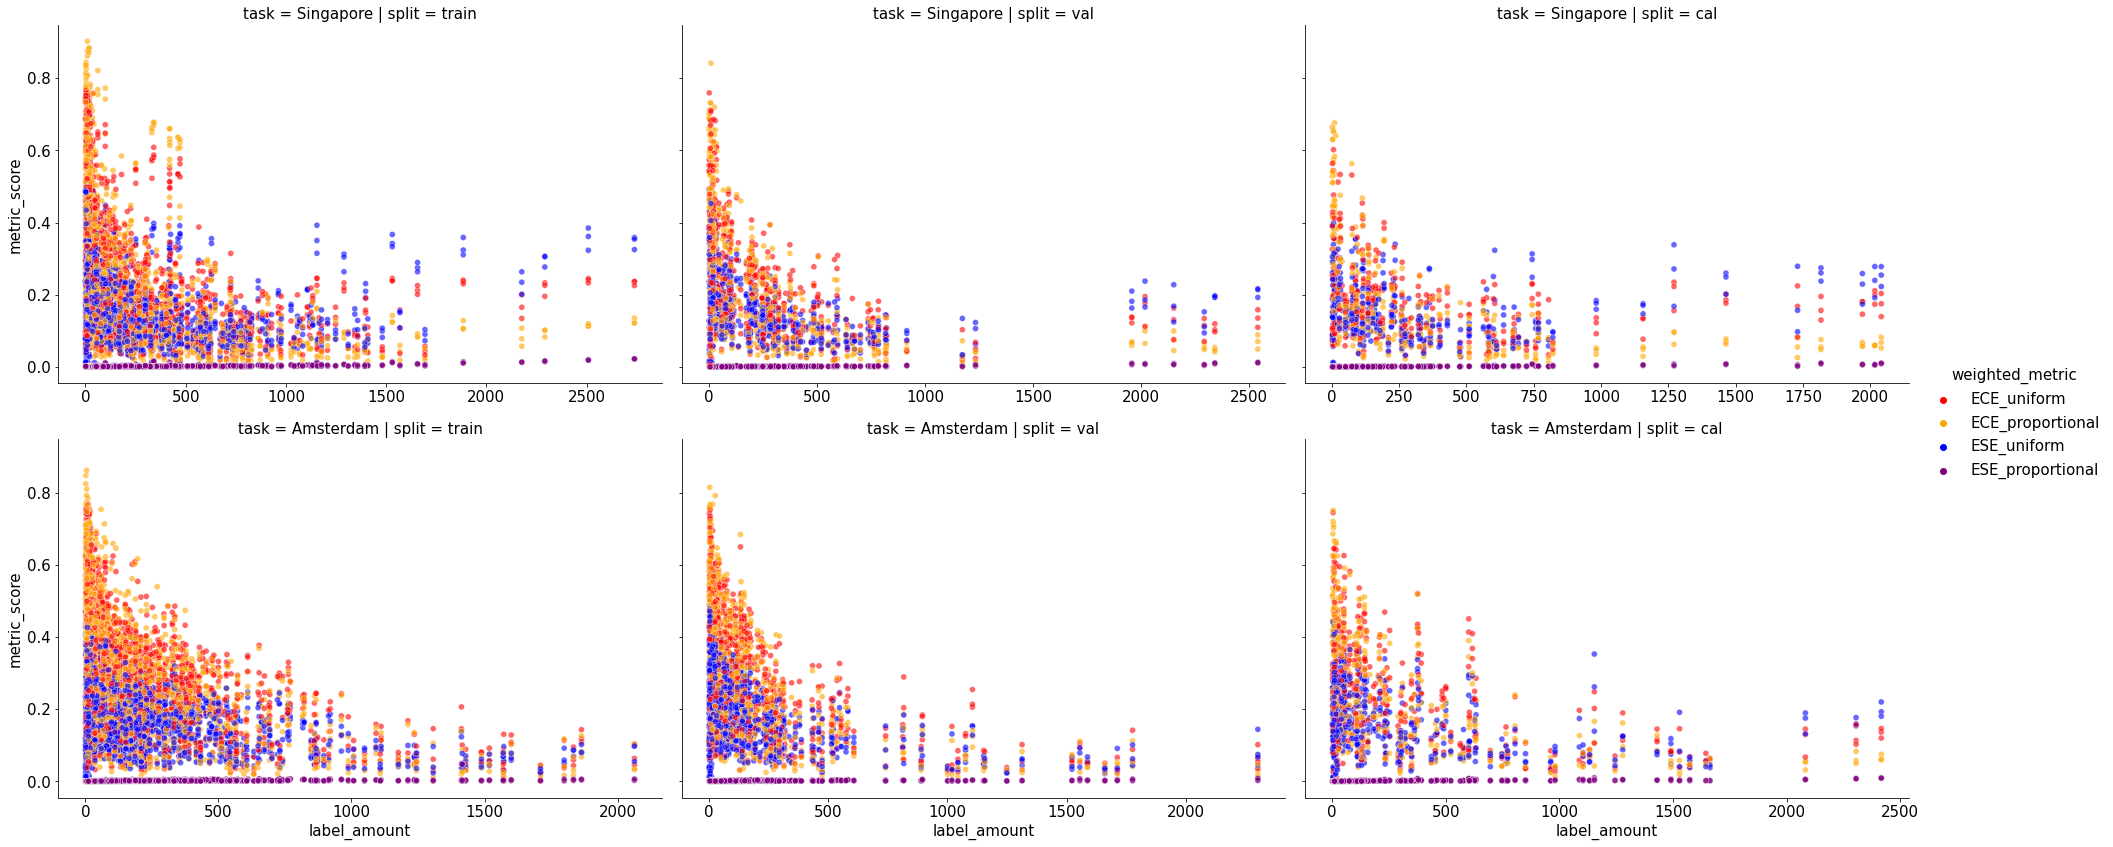

In [23]:
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='label_amount',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
   )


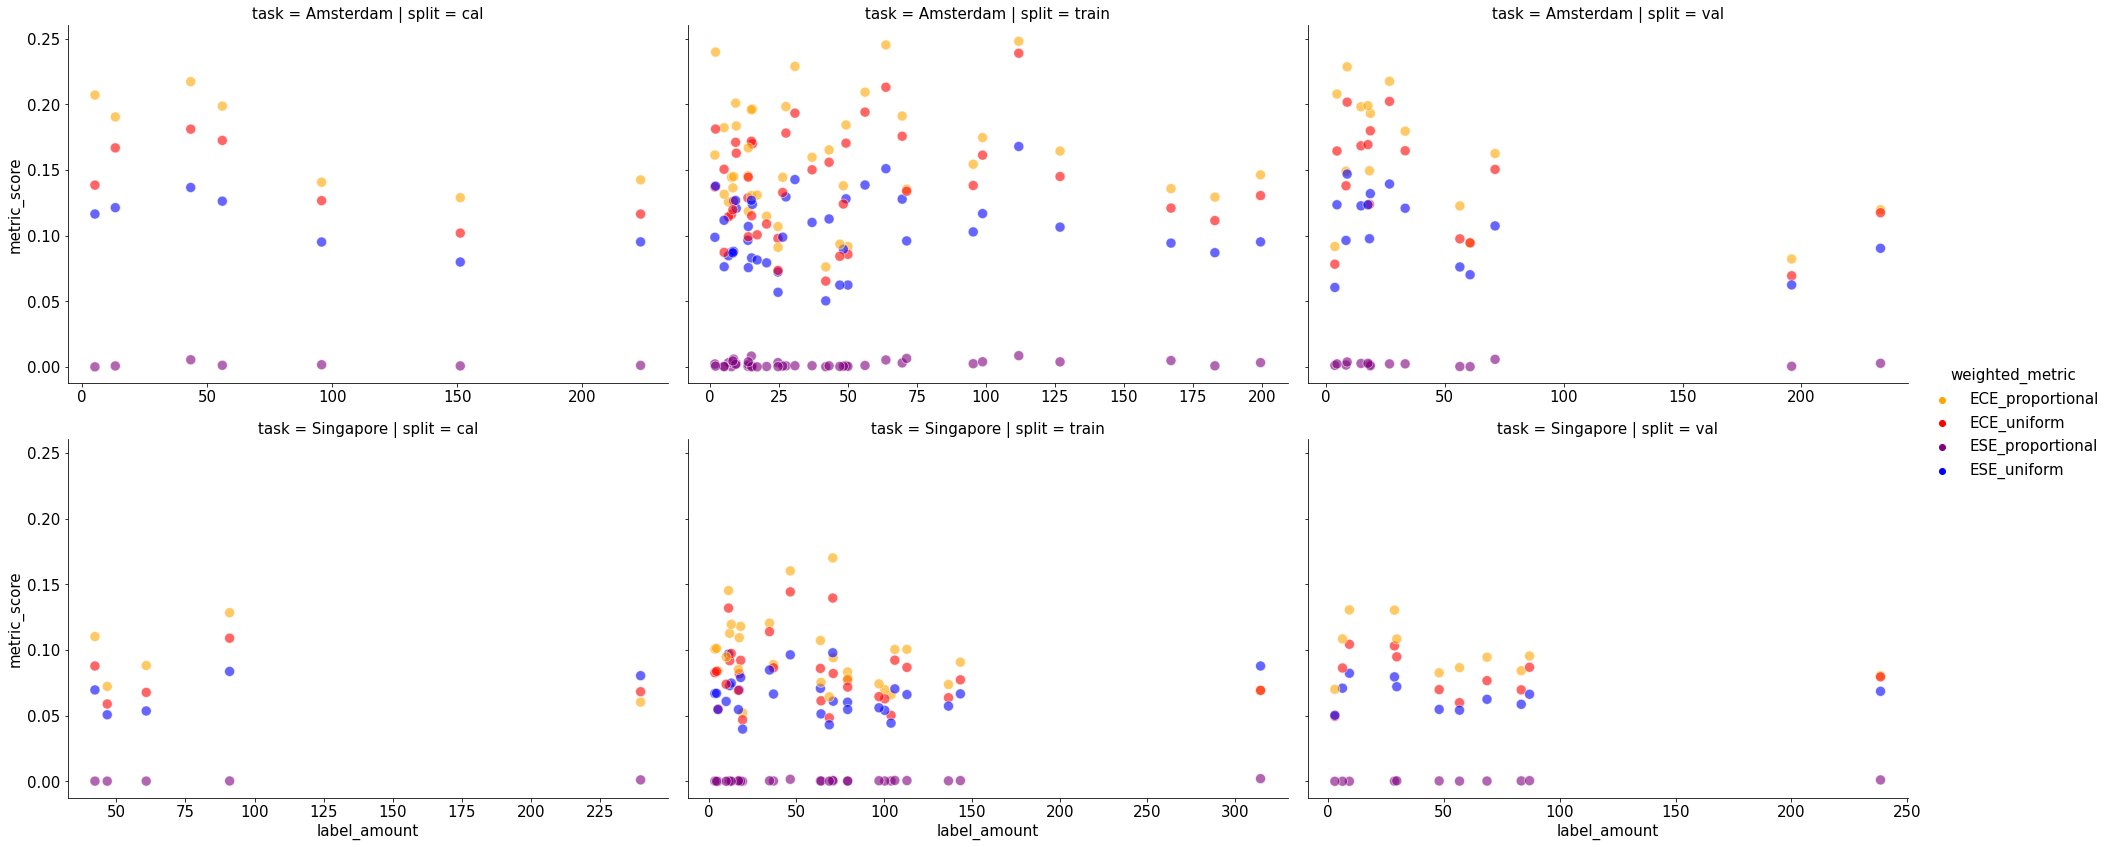

In [17]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='label_amount',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )

# Finally we can look at weighted accuracy as well.

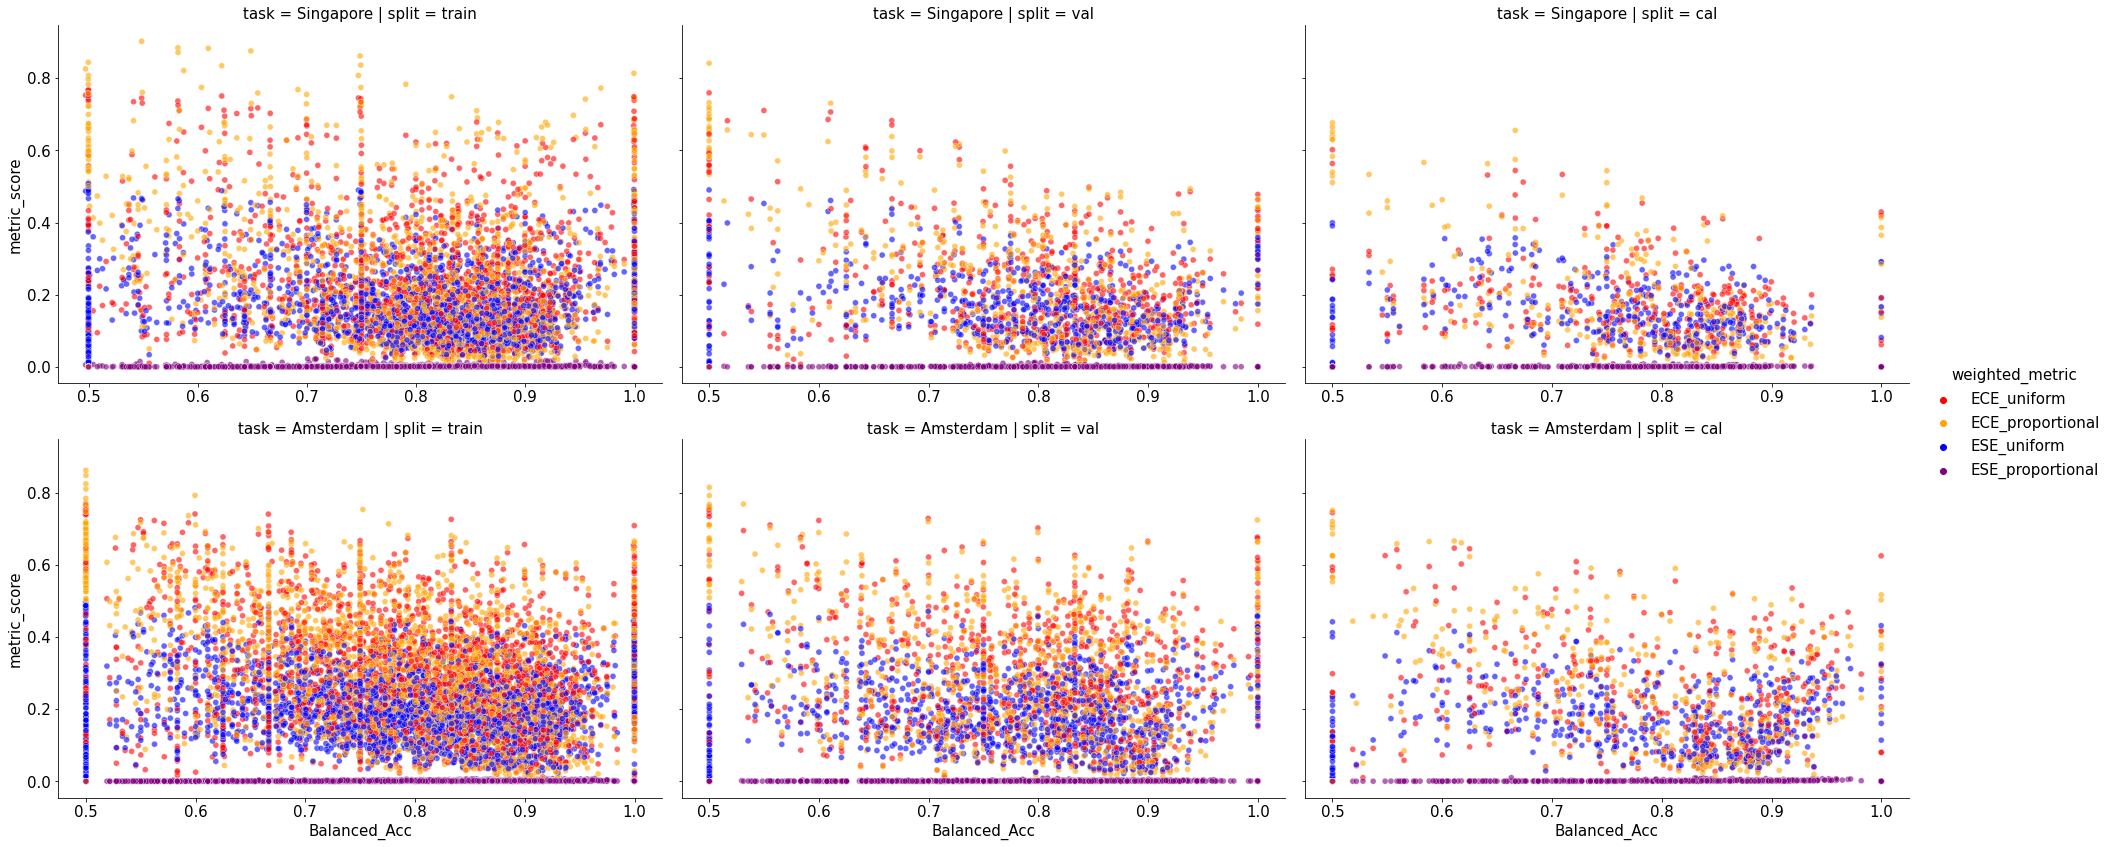

In [18]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs,
    x='Balanced_Acc',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
)

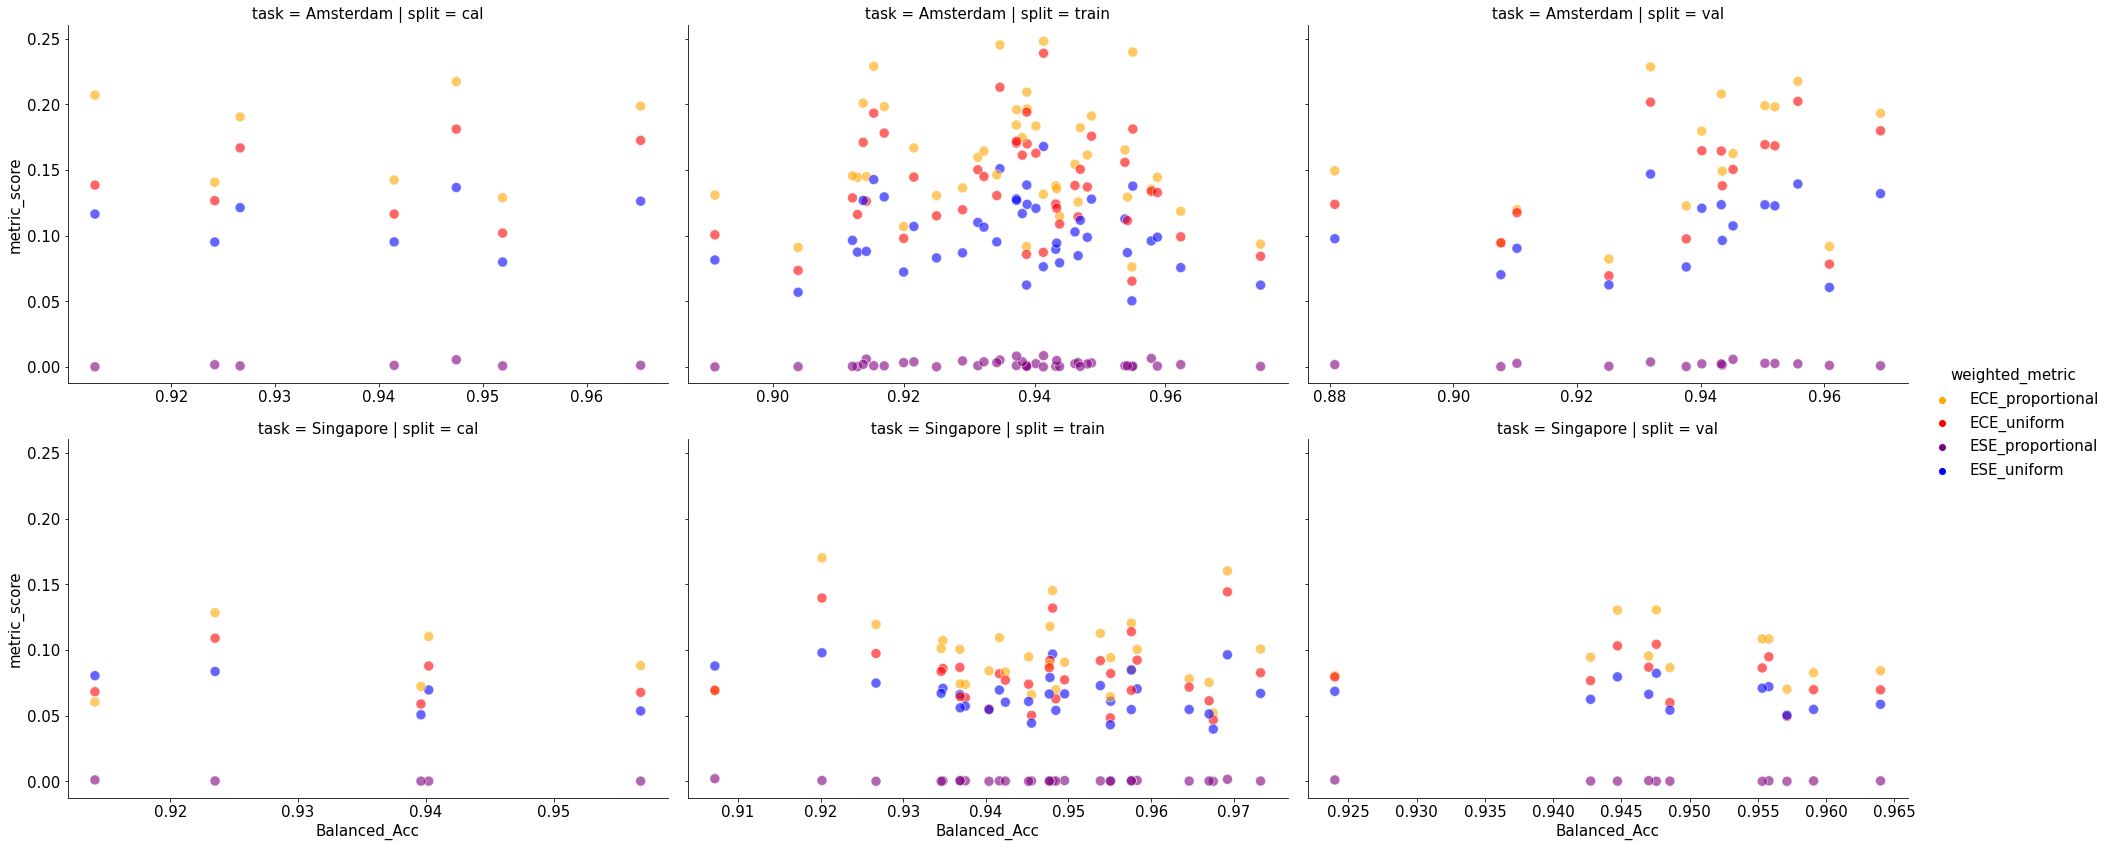

In [19]:
plt.rcParams.update({'font.size': 15})  

g = sns.relplot(
    data=logs_per_subject,
    x='Balanced_Acc',
    y='metric_score',
    row='task',
    col='split',
    hue='weighted_metric',
    kind='scatter',
    s=100,
    height=6,
    palette=metric_weight_palette,
    facet_kws={"sharex": False},
    alpha=0.6,
    aspect=1.5
    )